<a href="https://colab.research.google.com/github/dodosdel/projects/blob/main/Car_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [3]:
# importing data
data = pd.read_csv("/content/car_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# number of columns and rows
data.shape

(301, 9)

In [5]:
#checking null values in columns
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# overall info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
# how many different values in each columns
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [13]:
# replacing categorical data with numbers
data['Fuel_Type'].replace({"Petrol":0,"Diesel":1,"CNG":2},inplace=True)
data['Seller_Type'].replace({'Dealer':0,'Individual':1},inplace=True)
data['Transmission'].replace({"Manual":0,'Automatic':1},inplace=True)

In [14]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [15]:
#defining  train and target values
X = data.drop(columns=["Car_Name", "Selling_Price"])
Y = data['Selling_Price']

In [16]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [21]:
#Splitting train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

In [23]:
# model
lin_reg_model = LinearRegression()

In [24]:
#training model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [26]:
# model prediction
training_model_prediction = lin_reg_model.predict(X_train)

In [29]:
# R squad error
error_score = metrics.r2_score(Y_train,training_model_prediction)
print("R squad error: ", error_score)

R squad error:  0.8799451660493711


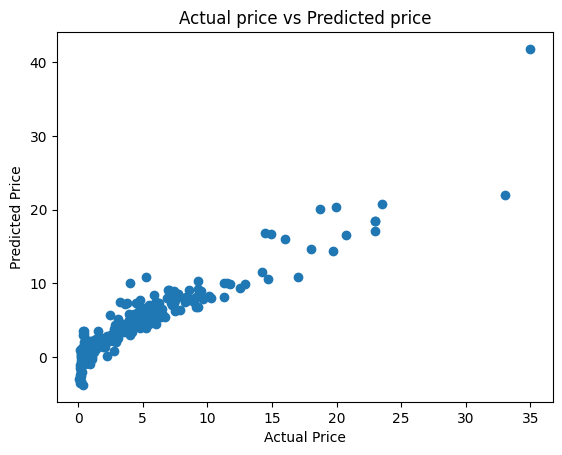

In [31]:
# visualization
plt.scatter(Y_train,training_model_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

In [32]:
# test data prediction
test_data_prediction = lin_reg_model.predict(X_test)

In [33]:
# R squared error
test_error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ",test_error_score)

R squared error:  0.8365766715027051


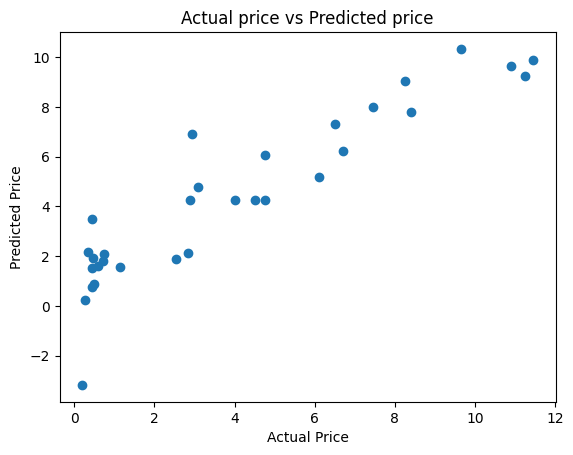

In [34]:
# visualization
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

In [35]:
# lasso
lass_reg_model = Lasso()

In [36]:
# training
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [37]:
# training data prediction
lass_reg_model.predict(X_train)

array([ 3.56679076e+00,  5.60257564e+00,  8.28781371e+00, -8.30814314e-01,
        5.27539880e+00,  6.50367937e+00,  5.73552938e+00,  6.41187200e+00,
        4.78218845e+00,  1.54979701e+01,  2.60868685e+00,  1.68164537e+00,
        4.65587149e-01,  5.14260426e+00,  6.87569869e+00,  1.60372469e+00,
        5.30299396e+00,  1.39150016e+01,  2.86877663e+00,  6.44421824e+00,
        9.38523430e-02,  9.99955865e+00,  1.79683394e+00,  2.66121014e+00,
        2.10269105e-02,  1.39327221e+00,  1.01152846e+01,  4.55985698e-01,
       -1.29850564e+00,  8.96458834e+00,  6.87473286e+00,  2.80689227e+00,
        4.00679563e+00,  8.93707044e-01,  3.11243615e+00,  2.61344453e+00,
        2.13519495e+00,  1.21115483e+00,  2.20395877e+00,  1.77253883e+00,
        4.40123646e+00,  4.26379158e+00,  1.53108120e+00,  2.67410546e+00,
        4.37186991e+00,  2.41613935e+00,  2.90706331e+00,  6.07491388e+00,
        5.02364608e+00,  4.39669701e+00,  3.59203190e+00,  2.67643327e+00,
        4.41172590e+00,  

In [39]:
# R squared error
error_score = metrics.r2_score(Y_train,training_model_prediction)
print("R squared error: ",error_score)

R squared error:  0.8799451660493711


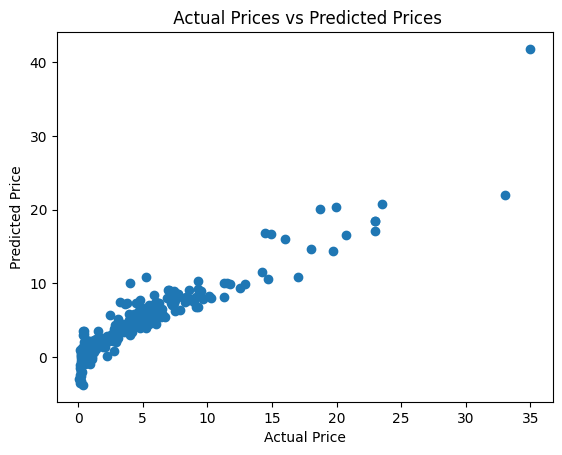

In [40]:
# visualization
plt.scatter(Y_train, training_model_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [41]:
# prediction on training data
test_data_prediction = lass_reg_model.predict(X_test)

In [43]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.8709167941173195


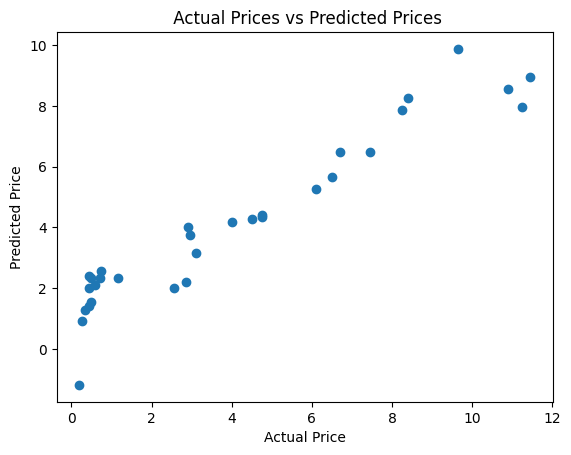

In [44]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()